In [9]:
import torch
import pandas as pd
import numpy as np
import librosa
import torch.nn as nn
import matplotlib.pyplot as plt
from torch.utils.data import random_split, DataLoader
from customDatasets.audioDataset import AudioDataset

def set_seed(seed = 42):
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)

CONFIG = {
    "seed": 42,
    "epochs": 1,
    "num_classes": 2,
    "learning_rate": 0.001,
    "train_batch_size": 32,
    "val_batch_size": 128,
    "device":
        torch.device(
            "cuda:0" if torch.cuda.is_available()
            else "mps" if torch.backends.mps.is_available()
            else "cpu"
        )
}

set_seed(CONFIG['seed'])

data_path = "./data/train/"

meta_train_df = pd.read_csv("./data/train.csv")

train_df = meta_train_df[['filename', 'is_normal', 'machine_id']]
num_unique_values = train_df['is_normal'].nunique()

print(train_df.head())
print(f"\n#####\n\nNumber of different is_normal's values: {num_unique_values}")

train_ds = AudioDataset(train_df, data_path)

train_ds.__getitem__(0)

train_ds.with_filename = True
num_items = len(train_ds)
num_train = round(num_items * 0.7)
num_val = round(num_items * 0.2)
num_test = round(num_items * 0.1)

# TODO: do we have to do this or for test we use data in test folder? Probably don't need to do it now
train_ds, val_ds, test_ds = random_split(train_ds, [num_train, num_val, num_test])

train_dl = DataLoader(train_ds, batch_size=CONFIG['train_batch_size'], shuffle=True)
val_dl = DataLoader(val_ds, batch_size=CONFIG['val_batch_size'], shuffle=False)

                    filename  is_normal  machine_id
0  normal_id_00_00000000.wav          1           0
1  normal_id_00_00000001.wav          1           0
2  normal_id_00_00000002.wav          1           0
3  normal_id_00_00000003.wav          1           0
4  normal_id_00_00000004.wav          1           0

#####

Number of different is_normal's values: 1


normal_id_04_00000276.wav


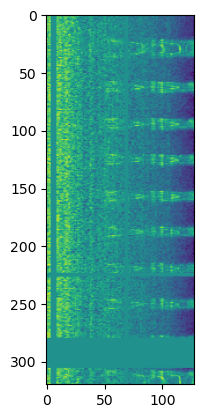

In [10]:
# take a sample from train_dl and plot it in 3d
sample = next(iter(train_dl))
frequencies=sample[0][0].numpy()
name=sample[2][0]
frequencies = frequencies.squeeze()
# grey
plt.imshow(frequencies)
print(name)

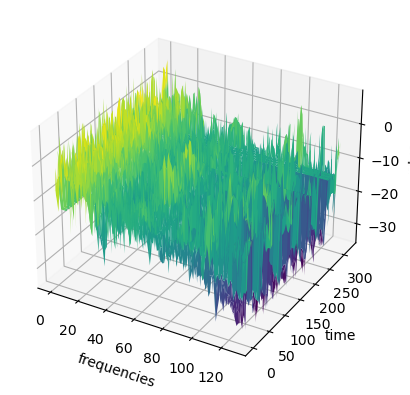

In [20]:
# Generate meshgrid for x and y coordinates
x = np.arange(frequencies.shape[0])
y = np.arange(frequencies.shape[1])
X, Y = np.meshgrid(x, y)

# Create 3D figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot 3D surface
ax.plot_surface(Y, X, frequencies.T, cmap='viridis')  # Transpose frequencies to match X, Y shape

# Set labels
ax.set_xlabel('frequencies')
ax.set_ylabel('time')
ax.set_zlabel('value')

plt.show()